In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [8]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 5000)

X_train = sequence.pad_sequences(X_train, maxlen = 500)
X_test = sequence.pad_sequences(X_test, maxlen = 500)

In [9]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, batch_size=40, epochs = 100,
                    validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 9s 15ms/step - loss: 0.4070 - accuracy: 0.8002 - val_loss: 0.3074 - val_accuracy: 0.8701
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 0.2383 - accuracy: 0.9071 - val_loss: 0.2762 - val_accuracy: 0.8891
Epoch 3/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1895 - accuracy: 0.9294 - val_loss: 0.2794 - val_accuracy: 0.8893
Epoch 4/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1480 - accuracy: 0.9448 - val_loss: 0.3080 - val_accuracy: 0.8842
Epoch 5/100
469/469 [==============================] - 6s 14ms/step - loss: 0.1130 - accuracy: 0.9602 - val_loss: 0.3462 - val_accuracy: 0.8790


In [13]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[0]))

782/782 [==============================] - 4s 5ms/step - loss: 0.3630 - accuracy: 0.8694
Test Accuracy: 0.3630


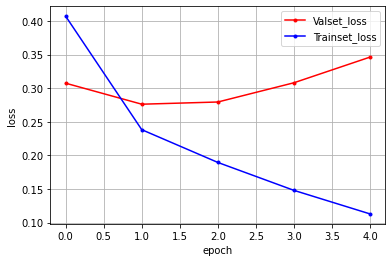

In [12]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Valset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()